In [1]:
# import the data

import pandas as pd
demog_data = pd.read_csv('dataset.csv')

In [2]:
# Encode the target variable 

demog_data['Target'] = demog_data['Target'].map({
    'Dropout':0,
    'Enrolled':2,
    'Graduate':1})

According to MetaData, the problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course. For students' dropout prediction, we need only the targets 'dropout' and 'graduate'.

In [3]:
# drop unrelated rows
demog_data = demog_data.drop(demog_data[demog_data['Target']==2].index).reset_index(drop=True)

# A. WITH feature reduction

In [4]:
# PSA for numerical variables.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

quantitative_cols = demog_data[['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                  'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
                  'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
                  'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
                  'Age at enrollment', 'Inflation rate', 'GDP', 'Unemployment rate']]
# Standardize the data on numerical attributes
scaler = StandardScaler()
num_vars_scaled = scaler.fit_transform(quantitative_cols)

# Perform PCA on non-scaled variables
pca = PCA()
pca.fit(quantitative_cols)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.40749073, 0.30719271, 0.10452442, 0.05075878, 0.03974883,
       0.02080679, 0.01919859, 0.01489874, 0.01079292, 0.00881695,
       0.00659434, 0.00356381, 0.00309894, 0.0010374 , 0.00090459,
       0.00057146])

The first 3 PCAs have better variance ratio. 

In [5]:
# Fit PCA with 3 principal components based on the cumulative variance ratio

pca = PCA(n_components=3)
pc_scores = pca.fit_transform(num_vars_scaled)

# Get the eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Create a dictionary to store the loadings
loadings = {}

for i, pc in enumerate(eigenvectors):
    loading_list = []
    for j, var in enumerate(quantitative_cols.columns):
        loading = pc[j]
        loading_list.append((var, loading))
        

    loading_list.sort(key=lambda x: abs(x[1]), reverse=True)
   
    loadings[f'PC{i+1}'] = loading_list

# Print out the loadings
for pc, loading_list in loadings.items():
    print(f'Principal Component {pc}:')
    for var, loading in loading_list:
        print(f'\t{var}: {loading:.3f}')
    print('\n')


Principal Component PC1:
	Curricular units 1st sem (approved): 0.365
	Curricular units 1st sem (enrolled): 0.361
	Curricular units 2nd sem (enrolled): 0.349
	Curricular units 2nd sem (approved): 0.340
	Curricular units 1st sem (evaluations): 0.308
	Curricular units 2nd sem (evaluations): 0.303
	Curricular units 1st sem (credited): 0.300
	Curricular units 2nd sem (credited): 0.300
	Curricular units 2nd sem (grade): 0.252
	Curricular units 1st sem (grade): 0.252
	Curricular units 1st sem (without evaluations): 0.059
	Curricular units 2nd sem (without evaluations): 0.032
	Unemployment rate: 0.022
	Age at enrollment: 0.018
	GDP: -0.014
	Inflation rate: 0.003


Principal Component PC2:
	Curricular units 2nd sem (grade): -0.418
	Curricular units 1st sem (grade): -0.397
	Curricular units 1st sem (without evaluations): 0.353
	Age at enrollment: 0.340
	Curricular units 2nd sem (without evaluations): 0.325
	Curricular units 1st sem (credited): 0.279
	Curricular units 2nd sem (credited): 0.276
	C

In [6]:
num_pca_df = pd.DataFrame(pc_scores, columns=['PC1', 'PC2', 'PC3'])
num_pca_df

,PC1,PC2,PC3
0,-5.267139,0.651190,-0.941373
1,0.063874,-1.399379,0.377828
2,-3.501380,1.158711,-1.457048
3,0.307570,-0.842753,0.697840
4,0.112210,0.067106,-0.247289
...,...,...,...
3625,0.053435,-0.590906,0.476100
3626,-0.619838,-0.901474,-0.020385
3627,0.524155,-0.437629,0.182953
3628,-0.620841,-1.021436,0.525796


In [7]:
categorical_cols = demog_data[["Marital status", "Application mode", "Application order", "Course", "Daytime/evening attendance",
                    "Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation",
                    "Father's occupation", "Displaced", "Educational special needs", "Debtor", "Tuition fees up to date", "Gender",
                    "Scholarship holder", "International",'Target']]

df_pca = pd.concat([categorical_cols, num_pca_df], axis=1)
df_pca

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target,PC1,PC2,PC3
0,1,8,5,2,1,1,1,13,10,6,...,0,0,1,1,0,0,0,-5.267139,0.651190,-0.941373
1,1,6,1,11,1,1,1,1,3,4,...,0,0,0,1,0,0,1,0.063874,-1.399379,0.377828
2,1,1,5,5,1,1,1,22,27,10,...,0,0,0,1,0,0,0,-3.501380,1.158711,-1.457048
3,1,8,2,15,1,1,1,23,27,6,...,0,0,1,0,0,0,1,0.307570,-0.842753,0.697840
4,2,12,1,3,0,1,1,22,28,10,...,0,0,1,0,0,0,1,0.112210,0.067106,-0.247289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,15,1,1,1,1,1,6,...,0,0,1,1,0,0,1,0.053435,-0.590906,0.476100
3626,1,1,2,15,1,1,19,1,1,10,...,0,1,0,0,0,1,0,-0.619838,-0.901474,-0.020385
3627,1,1,1,12,1,1,1,22,27,10,...,0,0,1,0,1,0,0,0.524155,-0.437629,0.182953
3628,1,1,1,9,1,1,1,22,27,8,...,0,0,1,0,1,0,1,-0.620841,-1.021436,0.525796


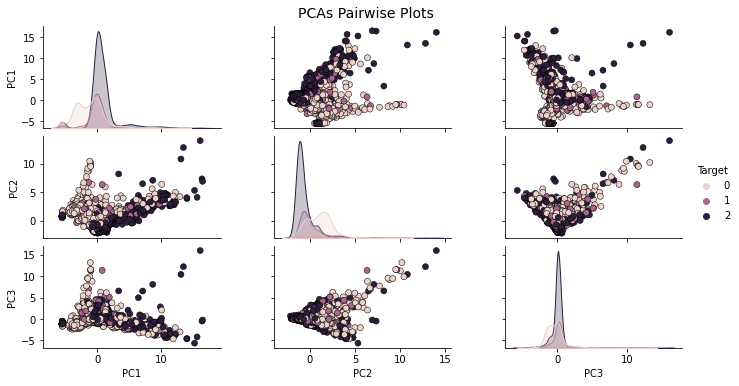

In [49]:
import seaborn as sns

cols = ['PC1', 'PC2', 'PC3', 'Target']
pp = sns.pairplot(df_pca[cols], hue='Target', height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('PCAs Pairwise Plots', fontsize=14)

target 'Enrolled' is not seperated from the other targets.

In [8]:
#split training set and test set

from sklearn.model_selection import train_test_split

X = df_pca.drop('Target', axis=1)
y = df_pca['Target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [9]:
# build models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=2)
lr = LogisticRegression(random_state=4)
svm = svm.SVC(kernel='linear',probability=True)
models = [dt,rfc,lr,svm]


def fit_predict_evaluate_model(model):
    
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    
    print (classification_report(y_test, predictions))
    print(confusion_matrix(y_test,predictions))

for m in models:
    print('/nModel : ',m,'\n',fit_predict_evaluate_model(m))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       432
           1       0.85      0.82      0.83       657

    accuracy                           0.80      1089
   macro avg       0.79      0.80      0.80      1089
weighted avg       0.81      0.80      0.80      1089

[[339  93]
 [121 536]]
/nModel :  DecisionTreeClassifier(random_state=0) 
 None
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       432
           1       0.86      0.95      0.90       657

    accuracy                           0.87      1089
   macro avg       0.88      0.86      0.86      1089
weighted avg       0.88      0.87      0.87      1089

[[330 102]
 [ 35 622]]
/nModel :  RandomForestClassifier(random_state=2) 
 None
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       432
           1       0.84      0.92      0.88       657

    accuracy          

C:\Users\B590\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.88      0.71      0.78       432
           1       0.83      0.93      0.88       657

    accuracy                           0.84      1089
   macro avg       0.85      0.82      0.83      1089
weighted avg       0.85      0.84      0.84      1089

[[305 127]
 [ 43 614]]
/nModel :  SVC(kernel='linear', probability=True) 
 None


From the selected models, Random Forest Classifier has the better performance.
But let's try to improve it.

In [42]:
# Hyperparameter Tuning 


from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [10]:
rfc_new = RandomForestClassifier(n_estimators= 600,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features='sqrt',
 max_depth=110,
 bootstrap = False,random_state=2)

print('/nModel : ',rfc_new,'\n',fit_predict_evaluate_model(rfc_new))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       432
           1       0.86      0.94      0.90       657

    accuracy                           0.87      1089
   macro avg       0.88      0.86      0.86      1089
weighted avg       0.88      0.87      0.87      1089

[[332 100]
 [ 38 619]]
/nModel :  RandomForestClassifier(bootstrap=False, max_depth=110, min_samples_leaf=2,
                       n_estimators=600, random_state=2) 
 None


the evaluation metrics are only slightly increased.

B. WITHOUT feature reduction

In [11]:
#split training set and test set
X = demog_data.drop('Target', axis=1)
y = demog_data['Target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)

print('/nModel : ',rfc_new,'\n',fit_predict_evaluate_model(rfc_new))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       432
           1       0.89      0.96      0.92       657

    accuracy                           0.90      1089
   macro avg       0.91      0.89      0.90      1089
weighted avg       0.91      0.90      0.90      1089

[[350  82]
 [ 24 633]]
/nModel :  RandomForestClassifier(bootstrap=False, max_depth=110, min_samples_leaf=2,
                       n_estimators=600, random_state=2) 
 None


In [15]:
print('/nModel : ',lr,'\n',fit_predict_evaluate_model(lr))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       432
           1       0.89      0.96      0.93       657

    accuracy                           0.91      1089
   macro avg       0.92      0.89      0.90      1089
weighted avg       0.91      0.91      0.91      1089

[[357  75]
 [ 24 633]]
/nModel :  LogisticRegression(random_state=4) 
 None


C:\Users\B590\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


we take the best performance with logistic regression classifier and without feature reduction.